In [1]:
#Allow matplotlib to plot inside this notebook

%matplotlib inline

/Users/lilige/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from __future__ import division, print_function, absolute_import, unicode_literals


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import animation, rc
from IPython.core.display import HTML, Image

In [4]:
#Call path to apple.csv file and read into notebook

data=pd.read_csv("/Users/lilige/documents/Course_material_dev/appledata.csv",skipinitialspace=True)


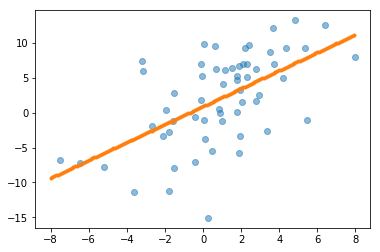

In [5]:
#Extract the specific values from the csv files and drop NA's, remove percent signs

data=data.dropna()
data['Return(AAPL) rAAPL']=data['Return(AAPL) rAAPL'].str.replace('%', ' ')
data['Return(AAPL) rAAPL']=data['Return(AAPL) rAAPL'].astype(float)
data['Return(SP500) rSP500']=data['Return(SP500) rSP500'].str.replace('%',' ')
data['Return(SP500) rSP500']=data['Return(SP500) rSP500'].astype(float)
t = data['Return(AAPL) rAAPL']
t=np.array(t)
x = data['Return(SP500) rSP500']
x = np.array(x)
slope, intercept, _,_,_ = stats.linregress(x,t)
best_fit=np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,t, 'o', alpha=0.5)
grid = np.arange(-8,8,0.1)
plt.plot(grid, best_fit(grid), '.')

In [6]:
#Define the function y = x * w

def nn(x,w): return x * w

In [7]:
#Define the cost function

def cost(y,t): return ((t-y)**2).sum()

In [8]:
#Plot the cost vs the given weight w

In [9]:
#Define a vector of weights for which we want to plot the cost 

ws = np.linspace(0, 2.8, num=3000) #weight values
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , t))(ws) #cost for each weight in ws

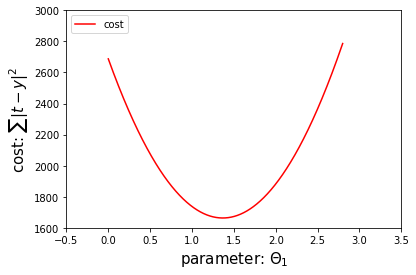

3000

In [10]:
#Plot

plt.plot(ws, cost_ws, 'r-', label='cost')
plt.ylim([1600, 3000])
plt.xlim([-0.5, 3.5])
plt.xlabel('parameter: $\Theta_1$', fontsize=15)
plt.ylabel('cost: $\sum |t-y|^2$', fontsize=15)
plt.legend (loc=2)
plt.show()
len(ws)

In [11]:
#Animation functions
def init_fig():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    #Line vs data plot
    #Plot the fitted line against the target line
    
    ax2. plot(x, t, 'bo', label='target: $r_{AAPL}$') #plot the target t versus the input x
    ax2.set_xlim([-8, 8])
    ax2.set_ylim([-16, 16])
    ax2.set_xlabel('input: $r_{SP500}$', fontsize=15)
    ax2.set_ylabel('target: $r_{AAPL}$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    
    #ax2.set_title('Labelled data & model output for L\Theta_a = 1.36 L', fontsize=18)
    
    line2, = ax2.plot([], [], 'k-', label='fitted line: $r_{AAPL}=r_{SP500}*\Theta_1$')
    ax2.legend(loc=2)
    
    #Cost function plot
    
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([1600,3000])
    ax1.set_xlim([-0.5, 3.5])
    ax1.set_xlabel('parameter: $\Theta_1$', fontsize=15)
    ax1.set_ylabel('Cost Function', fontsize=15)
    cost_text = ax1.set_title('Cost at step {}'. format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $\Theta_1$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    xs = np.linspace(0, 1.826, num=2000) #weight values 
    #(w, dw, cost)
    def anim(i):
        if i==0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Cost at step {} = {:.3f}'. format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        #Plot fit
        #Plot the fitted line
        ax2.set_title('Labelled data & model output for $\Theta_1$={:3f}'.format(w), fontsize=18)
        line2.set_xdata([-10,10])
        line2.set_ydata([-8*w, 8*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

In [12]:
#define the gradient function. Remember that y = nn(x, w) = x * w

def gradient(w, x, t):
    return 2 * x* (nn(x,w) - t)

In [13]:
#define the update function delta w

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

In [14]:
#set the initial weight parameter

w=0

#set the learning rate

learning_rate = 0.00025

In [15]:
#Start performing the gradient descent updates, and print the weights and costs

nb_of_iterations = 18 #number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] #List to store the weight, costs, values
weights = [(w, gradient(w, x, t).sum(), cost(nn(x, w),t))]
for i in range(nb_of_iterations):
    dw = delta_w(w,x,t, learning_rate) #Get the delta w update
    w = w-dw #update the current weight parameter
    gw = gradient(w, x, t).sum()
    c = cost(nn(x, w), t)
    w_cost.append((w,c)) #Add weight, cost to list
    weights.append((w, gw, c))

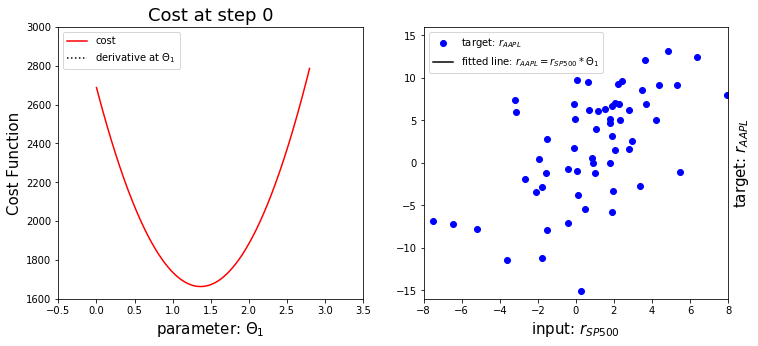

In [16]:
#Create animation (uses ffmpeg)

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig()
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=800, blit=True)

In [17]:
#Save animation as .gif

HTML(anim.to_html5_video())

In [20]:
#Plotting the animation and saving it as a .mp4 file

anim.save('UniVariable.mp4',writer=FFMpefFileWriter(),fps=0.1)

NameError: name 'FFMpefFileWriter' is not defined